In [1]:
#Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
#Load the dataset
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
datasets = [data,data_test]
print(data.columns)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [3]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7202310040,20150408T000000,635000.0,3,2.50,2620,6842,2.0,0,...,7,2620,0,2002,0,98053,47.6846,-122.037,2280,4800
1,1,4045100190,20141027T000000,2196000.0,4,3.25,4250,18000,2.0,0,...,10,3350,900,1980,0,98040,47.5612,-122.229,3790,14537
2,2,3205100010,20141216T000000,406000.0,3,1.50,1370,7853,1.0,0,...,7,1370,0,1962,0,98056,47.5409,-122.180,1730,9465
3,3,6071600340,20141113T000000,472800.0,3,2.25,1840,8400,1.0,0,...,8,1290,550,1961,0,98006,47.5497,-122.172,2110,8400
4,4,8838900167,20140509T000000,542500.0,4,2.50,2330,14289,2.0,0,...,8,2330,0,1978,0,98007,47.5916,-122.148,2210,12823


The stages of my workflow will be as follows:

1. Problem definition. 

2. Analyse and explore the data.

3. Prepare the data and cope with missing values.

5. Create a model to solve the problem.

6. Evluate the model.

7. Submit the solution.

Ad. 1
The definition of problem is predicting the house price and exploring the impact of different features on it.

Ad. 2
Let us start the data analysis phase by printing the pivot tables, which are a marvelous tool, providing valueable numerical insights into dataset.



In [4]:
#Analyse by pivoting features
pivoting_features = ["bedrooms","bathrooms","condition","view","yr_built","yr_renovated","grade","floors","waterfront"]
label = "price"
for feature in pivoting_features:
    print(data[[feature, label]].astype(float).groupby([feature], as_index=True).mean().sort_values(by=label, ascending=True),"\n\n\n")

                 price
bedrooms              
1.0       3.111956e+05
2.0       4.008473e+05
0.0       4.236292e+05
3.0       4.648880e+05
11.0      5.200000e+05
4.0       6.364506e+05
5.0       7.863580e+05
6.0       8.082952e+05
7.0       9.301040e+05
9.0       9.949998e+05
10.0      1.148000e+06
8.0       1.233000e+06 



                  price
bathrooms              
0.50       2.373750e+05
0.75       2.833445e+05
1.00       3.454407e+05
1.50       4.041231e+05
0.00       4.441778e+05
1.75       4.506407e+05
2.00       4.527365e+05
2.25       5.379709e+05
2.50       5.546705e+05
2.75       6.635848e+05
3.00       7.001379e+05
1.25       7.943000e+05
6.75       8.000000e+05
3.50       9.281270e+05
3.25       9.495169e+05
3.75       1.157518e+06
6.50       1.180000e+06
4.00       1.327289e+06
5.00       1.378096e+06
4.50       1.397619e+06
4.25       1.473649e+06
5.25       1.842430e+06
4.75       1.998214e+06
5.50       2.655714e+06
6.00       2.870250e+06
6.25       3.094000e+06
5.

From the histograms and pivot tables one can clearly see the following correlations:
- grade, view, condition and presence of waterfront are positively correlated with the price
- bedrooms, bathrooms and floors are overall positively correlated with the price, with some anomalies though. This might be due to errors/noise in the dataset or because some groups are not representative (e.g. there will be very little houses with 11 bedrooms)

Let us now plot price against the continuos features.




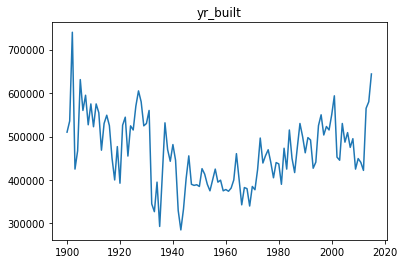

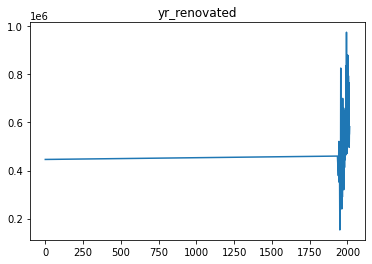

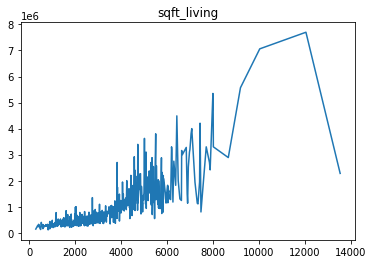

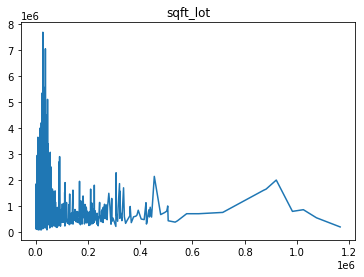

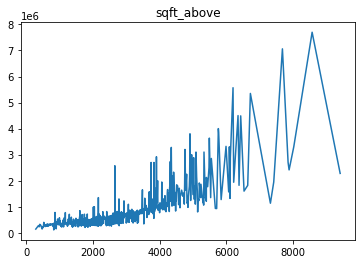

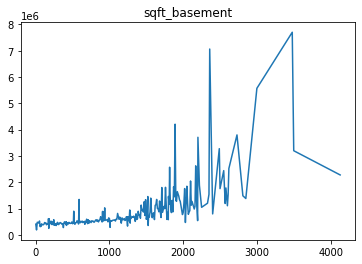

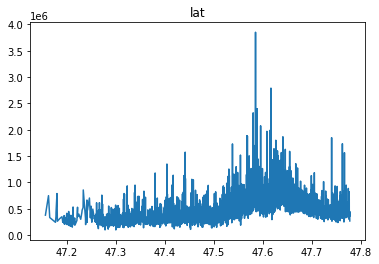

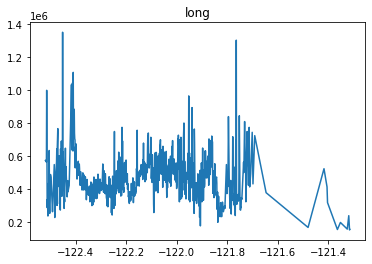

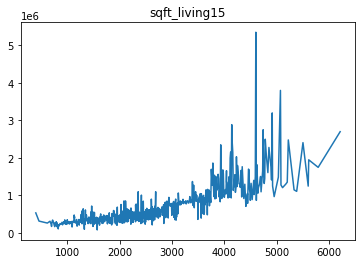

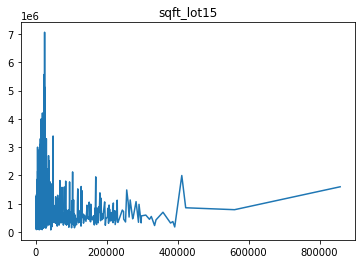

In [5]:
cont_features = ["yr_built","yr_renovated",'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15'] 
label = "price"
for feature in cont_features:
        plt.plot(data[[feature, label]].astype(float).groupby([feature], as_index=True).median())
        plt.title(str(feature))
        plt.show()
    

Those plot are not telling us much, since the changes are too rapid. In order to make them more interpretible, lets divide every feature into bands and then plot median value for every band. Two resolutions will be plotted wth the number of bands being equal to 5 and 10.




 yr_built


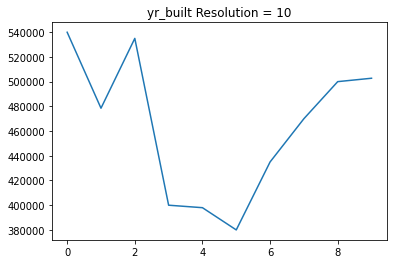

                    price
bands                    
(1899.885, 1911.5]    614
(1911.5, 1923.0]      644
(1923.0, 1934.5]      763
(1934.5, 1946.0]      943
(1946.0, 1957.5]     1773
(1957.5, 1969.0]     2258
(1969.0, 1980.5]     1798
(1980.5, 1992.0]     1973
(1992.0, 2003.5]     1865
(2003.5, 2015.0]     2498


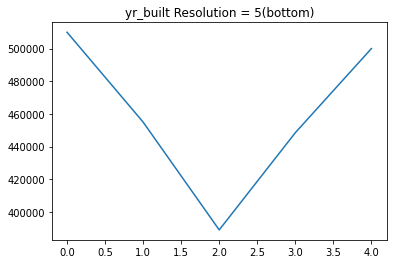

                    price
bands                    
(1899.885, 1923.0]   1258
(1923.0, 1946.0]     1706
(1946.0, 1969.0]     4031
(1969.0, 1992.0]     3771
(1992.0, 2015.0]     4363



 yr_renovated


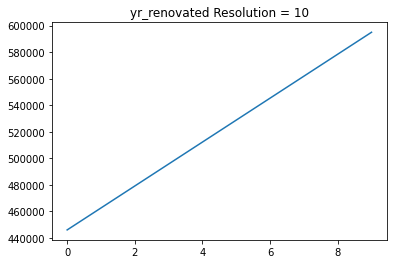

                  price
bands                  
(-2.015, 201.5]   14497
(201.5, 403.0]        0
(403.0, 604.5]        0
(604.5, 806.0]        0
(806.0, 1007.5]       0
(1007.5, 1209.0]      0
(1209.0, 1410.5]      0
(1410.5, 1612.0]      0
(1612.0, 1813.5]      0
(1813.5, 2015.0]    632


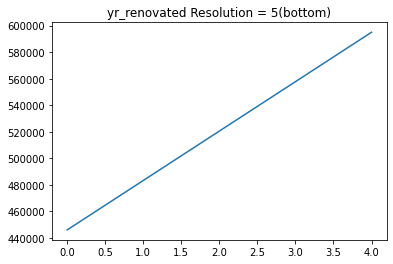

                  price
bands                  
(-2.015, 403.0]   14497
(403.0, 806.0]        0
(806.0, 1209.0]       0
(1209.0, 1612.0]      0
(1612.0, 2015.0]    632



 sqft_living


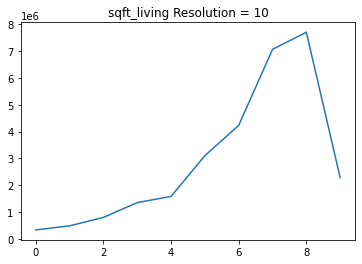

                    price
bands                    
(276.75, 1615.0]     5322
(1615.0, 2940.0]     7475
(2940.0, 4265.0]     1948
(4265.0, 5590.0]      307
(5590.0, 6915.0]       55
(6915.0, 8240.0]       17
(8240.0, 9565.0]        2
(9565.0, 10890.0]       1
(10890.0, 12215.0]      1
(12215.0, 13540.0]      1


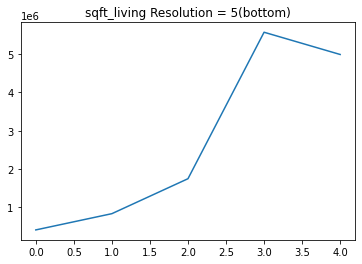

                    price
bands                    
(276.75, 2940.0]    12797
(2940.0, 5590.0]     2255
(5590.0, 8240.0]       72
(8240.0, 10890.0]       3
(10890.0, 13540.0]      2



 sqft_lot


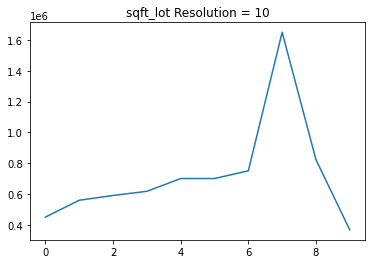

                        price
bands                        
(-564.194, 117019.4]    14854
(117019.4, 233438.8]      185
(233438.8, 349858.2]       47
(349858.2, 466277.6]       25
(466277.6, 582697.0]        9
(582697.0, 699116.4]        1
(699116.4, 815535.8]        1
(815535.8, 931955.2]        3
(931955.2, 1048374.6]       2
(1048374.6, 1164794.0]      2


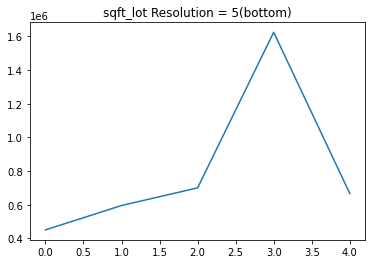

                       price
bands                       
(-564.194, 233438.8]   15039
(233438.8, 466277.6]      72
(466277.6, 699116.4]      10
(699116.4, 931955.2]       4
(931955.2, 1164794.0]      4



 sqft_above


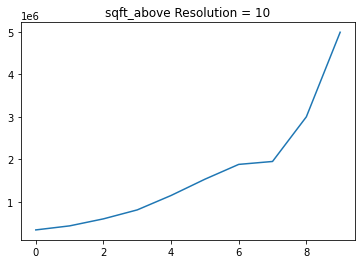

                  price
bands                  
(280.88, 1202.0]   3939
(1202.0, 2114.0]   7011
(2114.0, 3026.0]   2835
(3026.0, 3938.0]   1024
(3938.0, 4850.0]    247
(4850.0, 5762.0]     48
(5762.0, 6674.0]     16
(6674.0, 7586.0]      3
(7586.0, 8498.0]      4
(8498.0, 9410.0]      2


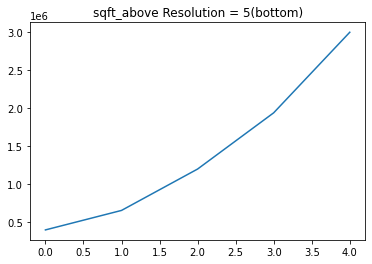

                  price
bands                  
(280.88, 2114.0]  10950
(2114.0, 3938.0]   3859
(3938.0, 5762.0]    295
(5762.0, 7586.0]     19
(7586.0, 9410.0]      6



 sqft_basement


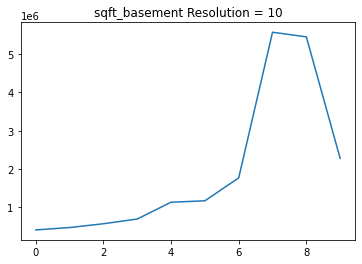

                  price
bands                  
(-4.13, 413.0]    10507
(413.0, 826.0]     2369
(826.0, 1239.0]    1593
(1239.0, 1652.0]    502
(1652.0, 2065.0]    114
(2065.0, 2478.0]     28
(2478.0, 2891.0]     12
(2891.0, 3304.0]      1
(3304.0, 3717.0]      2
(3717.0, 4130.0]      1


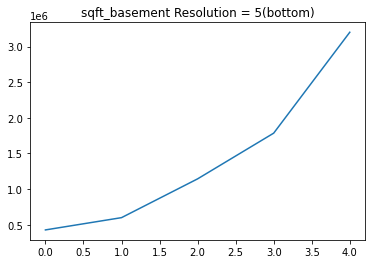

                  price
bands                  
(-4.13, 826.0]    12876
(826.0, 1652.0]    2095
(1652.0, 2478.0]    142
(2478.0, 3304.0]     13
(3304.0, 4130.0]      3



 lat


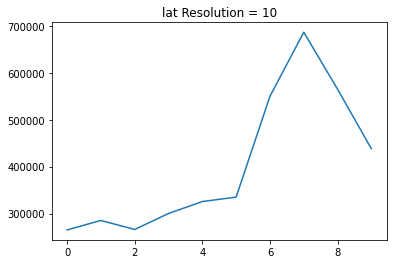

                  price
bands                  
(47.155, 47.218]    128
(47.218, 47.28]     237
(47.28, 47.342]    1015
(47.342, 47.405]   1378
(47.405, 47.467]   1019
(47.467, 47.529]   1801
(47.529, 47.591]   2738
(47.591, 47.653]   2046
(47.653, 47.715]   2824
(47.715, 47.778]   1943


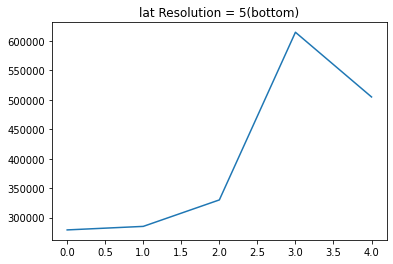

                  price
bands                  
(47.155, 47.28]     365
(47.28, 47.405]    2393
(47.405, 47.529]   2820
(47.529, 47.653]   4784
(47.653, 47.778]   4767



 long


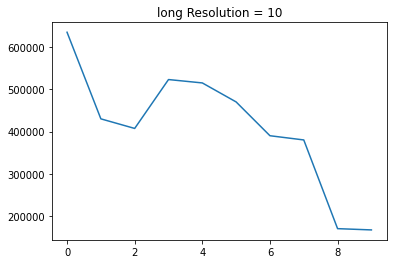

                      price
bands                      
(-122.52, -122.399]     305
(-122.399, -122.278]   6142
(-122.278, -122.158]   3972
(-122.158, -122.037]   2759
(-122.037, -121.917]   1450
(-121.917, -121.797]    335
(-121.797, -121.676]    153
(-121.676, -121.556]      1
(-121.556, -121.435]      1
(-121.435, -121.315]     11


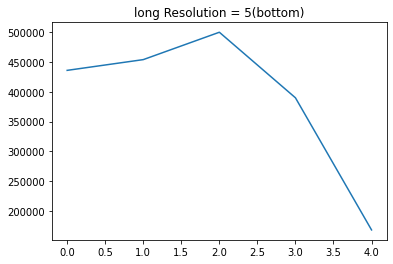

                      price
bands                      
(-122.52, -122.278]    6447
(-122.278, -122.037]   6731
(-122.037, -121.797]   1785
(-121.797, -121.556]    154
(-121.556, -121.315]     12



 sqft_living15


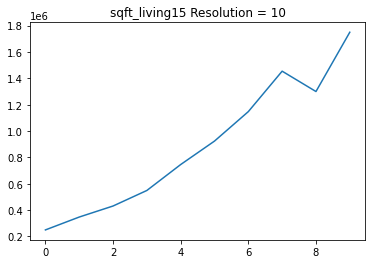

                  price
bands                  
(393.189, 980.1]    237
(980.1, 1561.2]    4550
(1561.2, 2142.3]   5235
(2142.3, 2723.4]   2939
(2723.4, 3304.5]   1388
(3304.5, 3885.6]    538
(3885.6, 4466.7]    164
(4466.7, 5047.8]     60
(5047.8, 5628.9]     11
(5628.9, 6210.0]      7


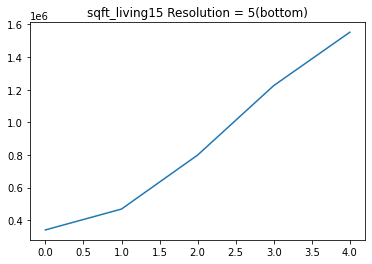

                   price
bands                   
(393.189, 1561.2]   4787
(1561.2, 2723.4]    8174
(2723.4, 3885.6]    1926
(3885.6, 5047.8]     224
(5047.8, 6210.0]      18



 sqft_lot15


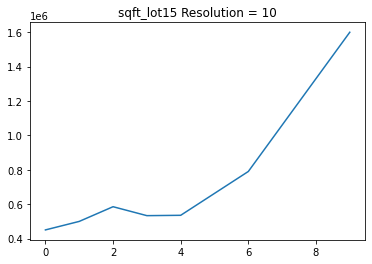

                      price
bands                      
(-206.481, 86399.1]   14832
(86399.1, 172147.2]     148
(172147.2, 257895.3]    123
(257895.3, 343643.4]     18
(343643.4, 429391.5]      6
(429391.5, 515139.6]      0
(515139.6, 600887.7]      1
(600887.7, 686635.8]      0
(686635.8, 772383.9]      0
(772383.9, 858132.0]      1


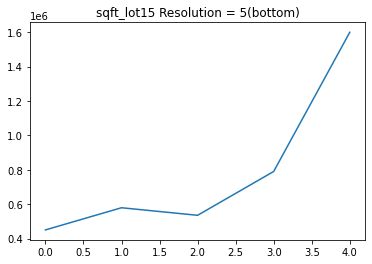

                      price
bands                      
(-206.481, 172147.2]  14980
(172147.2, 343643.4]    141
(343643.4, 515139.6]      6
(515139.6, 686635.8]      1
(686635.8, 858132.0]      1


In [6]:
cont_features = ["yr_built","yr_renovated",'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15'] 
label = "price"
for feature in cont_features:
        print("\n\n\n",feature)
        data["bands"] = pd.cut(data[feature],bins=10)
        plt.plot(data[["bands", label]].groupby(["bands"], as_index=True).median().dropna())
        plt.title(str(feature) + " Resolution = 10")
        plt.show()
        

        print(data[["bands", label]].groupby(["bands"], as_index=True).count().dropna())
        data.drop("bands",axis=1,inplace=True)
        

        data["bands"] = pd.cut(data[feature],bins=5)
        plt.plot(data[["bands", label]].groupby(["bands"], as_index=True).median().dropna())
        plt.title(str(feature) + " Resolution = 5(bottom)")
        plt.show()

        print(data[["bands", label]].groupby(["bands"], as_index=True).count().dropna())
        data.drop("bands",axis=1,inplace=True)

It looks like the correlation of year built is less straightforward, which can be expected as new houses will have high prices as they are in a good condition, but also old houses will have high prices because they are considered classy and antique. One may expect the correlation between the year built and price will not be linear. And this is learly the case.

Corellation between year renovated, sqft_living, sqft_lot, sqft_living15, sqft_lot15, sqft_above, sqft_basement and the price is positive. Alhtough, for large values the price might drop, these are most likely outliers, which is refelcted by the occurence pivot tables displayed below plots.

For longtitude and latitude, it looks like there are "pockets" in which the price drops/ raises. This is to be expected, as for example price in cities will be on average higher than in the country side. The pockets in which the price suddenly raises most likely correspond to longtitudes and latitudes of citites. Those features will be divided into discrete bands before feeding to any model.

In [7]:
#Divide features into bands and add into dataset
band_features = ["long","lat"]
for dataset in datasets:
    for feature in band_features:
        dataset[feature].fillna(dataset[feature].dropna().mode()[0],inplace=True)
        for i,band in enumerate(sorted(pd.unique(pd.cut(dataset[feature], 5)))):
            dataset.loc[(dataset[feature]>band.left) & (dataset[feature]<band.right),feature + " Band"] = i
        
        dataset.drop(feature,inplace=True,axis=1)

non_number_features = ["long" + " Band","lat" + " Band"]

for dataset in datasets:
    for feature in non_number_features:
        dataset[feature].fillna(dataset[feature].dropna().mode()[0])
        
        for value in pd.unique(dataset[feature])[:-1]:
            dataset[feature + "=" + (str)(value)] = (dataset[feature]==value).astype(int)
        
        dataset.drop(feature,inplace=True,axis=1)


Lets have a look at the date feature:

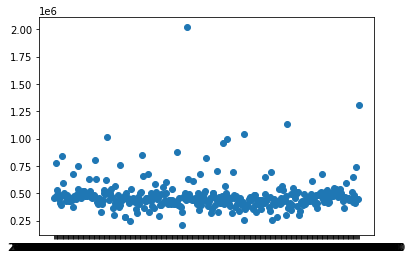

In [8]:
date_pivot_table = data[["date", "price"]].groupby(["date"], as_index=True).median().dropna()
plt.plot_date(pd.unique(data["date"]),date_pivot_table["price"])
plt.show()

The date does not seem to impact the price of the purchase. It will be therefore ignored in the training.

Zipcode will be very hard to model and may not reveal many useful information, and therefore will be deleted. Id is just used for identification and will not be sued as a training feature.

In [9]:
#Drop off redundant features
for dataset in datasets:
    redundant_features = ["Unnamed: 0",'zipcode',"date"]
    dataset.drop(redundant_features,axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)


In [10]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long Band=nan,long Band=1.0,long Band=2.0,long Band=0.0,long Band=3.0,lat Band=4.0,lat Band=3.0,lat Band=2.0,lat Band=1.0,lat Band=0.0
0,635000.0,3,2.50,2620,6842,2.0,0,0,3,7,...,0,0,0,0,0,1,0,0,0,0
1,2196000.0,4,3.25,4250,18000,2.0,0,3,5,10,...,0,1,0,0,0,0,1,0,0,0
2,406000.0,3,1.50,1370,7853,1.0,0,0,4,7,...,0,1,0,0,0,0,1,0,0,0
3,472800.0,3,2.25,1840,8400,1.0,0,0,3,8,...,0,1,0,0,0,0,1,0,0,0
4,542500.0,4,2.50,2330,14289,2.0,0,0,4,8,...,0,1,0,0,0,0,1,0,0,0


In [11]:
#Train / CV / Test split

data_cv = data.sample(frac=0.75)
data = data.drop(data_cv.index)

X_cv = data_cv.drop("price",axis=1)
Y_cv = data_cv["price"]

X_train = data.drop("price", axis=1)
Y_train = data["price"]


X_test = data_test.drop("id", axis=1)

In [12]:
# Train and evaluate all models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression,PassiveAggressiveRegressor, ElasticNet
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error



pipeline = Pipeline([("scaler",StandardScaler())])

pipeline.fit(X_train)
standarised_X_train = pipeline.transform(X_train)
standarised_X_cv = pipeline.transform(X_cv)
standarised_X_test = pipeline.transform(X_test)

models = {"Linear Regression": LinearRegression(),
          "Ridge Regression": Ridge(),
          "Lasso Regression": Lasso(),
          "ElasticNet Regression": ElasticNet(),
          "Bayesian Ridge": BayesianRidge(),
          "Passive Aggressive Regression":PassiveAggressiveRegressor(),
          "Automatic Relevance Determination": ARDRegression(),
          "Orthognal Matching Pursuit": OrthogonalMatchingPursuit(),
          "Support Vector Regression":svm.SVR(),
          "Kernel Ridge Regression":KernelRidge(),
          "Gaussian Process":GaussianProcessRegressor()}

error = dict()
error_cv = dict()

for model_name, model in models.items():
    model.fit(standarised_X_train, Y_train)
    error[model_name]= round(mean_absolute_error(model.predict(standarised_X_train),Y_train), 2)
    error_cv[model_name] = round(mean_absolute_error(model.predict(standarised_X_cv),Y_cv), 2)
    

/home/juliuszziomek/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73190007503374.56, tolerance: 56257467414.223564
  positive)


In [13]:
model_names = list(model for model in models)

models_scores = pd.DataFrame({
    'Model': model_names,
    'Train Abs. Error': list(error[model] for model in model_names),
    'Cv Abs. Error': list(error_cv[model] for model in model_names),})
models_scores.sort_values(by='Cv Abs. Error', ascending=True)

,Model,Train Abs. Error,Cv Abs. Error
5,Passive Aggressive Regression,108915.90,108180.45
3,ElasticNet Regression,116810.53,116312.27
4,Bayesian Ridge,122633.46,123084.45
6,Automatic Relevance Determination,122743.32,123179.51
1,Ridge Regression,122874.44,123374.15
2,Lasso Regression,122899.79,123376.41
0,Linear Regression,123182.51,123681.26
7,Orthognal Matching Pursuit,161765.46,160597.26
8,Support Vector Regression,227146.90,219801.41
10,Gaussian Process,173.38,259381.26


In [14]:
#Lets choose the best model and save submission

pred = models["Passive Aggressive Regression"].predict(pipeline.transform(X_test))

submission = pd.DataFrame({
        "id":data_test["id"].astype(np.int32),
        "price": pred
    })


submission.to_csv('submission.csv', index=False)